## Import data

In [1275]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

path_to_file = 'train_titanic.csv'

titanic_data = pd.read_csv(path_to_file, index_col='PassengerId')

# Context

## What is titanic dataset about?

Titanic is a dataset that contains features about people who were on Titanic like age, port in which they were embarked, whether they survived the Titanic catastrophe and etc.

In [1276]:
titanic_data.head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S
7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S
8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S


## What is the unique id for each row of data?

Each row of data is identified by a 'PassengerId' column.

## Understanding the meaning of each variable

In [1277]:
list(titanic_data.columns.values)

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

Those are the variables/features that we have

Let's understand the meaning of all features (variables) in the dataset:

'Survived' - whether a person survived the catastrophe or not, values 0 - dead and 1 - alive

'Pclass' - class of the cabin, can be 1st, 2nd or 3rd

'Name' - name of the passenger, contains of First Name and Surname

'Sex' - sex of the passenger, can be 'male' or 'female'

'Age' - age of the person

'SibSp' - number of horizontal relatives (siblings and spouses) a person travelled with

'Parch' - number of vertical relatives (parents or children) a person travelled with

'Ticket' - an id of a ticket

'Fare' - amount of money person paid for a cabin

'Cabin' - number of a cabin, consists of a letter representing deck and a number

'Embarked' - name of the port in which person came on board of Titanic. Values are either 'C' - Cherbourg, 'S' - Southampton, or 'Q' - Queenstown

## Deck plan

Since column 'Cabin' contains values with letters, and letters represent decks on Titanic, I will leave here a plane of Titanic decks.

 ![Titanic Deck plan](titanic_deck_plan.jpg)

# Data quality assessment

## Number of raws and columnms

Let's check how many raws and columns the initial dataset has using shape method

In [1278]:
titanic_data_shape = titanic_data.shape
titanic_data_shape

(100000, 11)

In other words, there are 100,000 raws and 11 columns with features (with index it would be 12 columns)

## Types of columns

Let's inspect data types of columns

In [1279]:
titanic_data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [1280]:
titanic_data.dtypes.value_counts()

object     5
int64      4
float64    2
dtype: int64

The dataset has 4 columns with integers, 2 columns with floats and 5 columns with object values.

## Categorizing features

Our features can be divided in 2 groups based on their datatypes:

1. Categorical features represent characteristics, and numbers can be used as values in them (for exampled, for a categorical feature 'Survived' dead means a number 0 and alive means a number 1 but we cannot add those numbers or calculate their mean because they represent characteristics)

There are 5 features with categorical data:
1. Survived
2. Pclass
3. Sex
4. Cabin
5. Embarked

A sub-class of categorical features are ordinal features. Ordinal features are the ones that can be ranked. In our case, ordinal feature is a 'Pclass' because 1st class is higher than 2nd, and 2nd is higher than 3rd.


2. Quantitative (numeric) features. It's data which values are exact numbers.

Quantitative data:
1. Age
2. Fare
3. SibSp
4. Parch

Moreover, quantitive data can be divided in continuos and discrete. Continuos can take any value in a range while discrete takes certain values. For example, age in our dataset has years and months, so it can take any value in a range between 0 and highest value of age possible.

Continuous values:
1. Age
2. Fare

Discrete values:
    
1. SibSp
2. Parch

## Checking for duplicates

In [1281]:
titanic_data.duplicated().value_counts()

False    100000
dtype: int64

There is no duplicated data in the dataset.

## Dealing with syntax errors and range constrains

There are certain ranges and logical values which certain variables can have. For example, age cannot be negative, fare cannot be negative and etc.

Let's check those ranges for each variable.

### Pclass

According to the internet, on Titanic there were only 3 classes of cabins: 1st, 2nd and 3rd. Let's check that this is really like this in our dataset.

In [1282]:
titanic_data.Pclass.value_counts()

3    41006
1    30315
2    28679
Name: Pclass, dtype: int64

True, the data is within the range of discrete values.

### Sex

Let's check that sex is within a range of discrete values 'male' or 'female'.

In [1283]:
titanic_data.Sex.value_counts()

male      56114
female    43886
Name: Sex, dtype: int64

True, the data is within the range of discrete values.

### Age

Let's check that age is bigger than 0 and less than 122 (the highest age that a person lived was 122 years according to the internet).

In [1284]:
titanic_data.loc[(titanic_data.Age <= 0) | (titanic_data.Age >= 122)].count()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

True, ages are bigger than 0 and lower than 122.

### SibSp

Let's check that SibSp is NOT a negative number since number of people cannot be negative.

In [1285]:
titanic_data.loc[(titanic_data.SibSp < 0)].count()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

True, there are no negative values of SibSp.

### Parch

Let's check that Parch is NOT a negative number since number of people cannot be negative.

In [1286]:
titanic_data.loc[(titanic_data.Parch < 0)].count()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

True, there are no negative values of Parch.

### Fare

Let's check that 'Fare' is NOT equal to negative number, 0 or too big number which would be impossible to pay.

In [1287]:
titanic_data['Fare'].min(), titanic_data['Fare'].max()

(0.68, 744.66)

True, there are no negative, 0 or too big values.

### Embarked

According to the internet, there were three ports (towns) from which people got on board of Titanic: 'S', 'Q', and 'C'. Let's check that this is really like this.

In [1288]:
titanic_data.Embarked.value_counts()

S    72139
C    22187
Q     5424
Name: Embarked, dtype: int64

True, there are 3 ports (towns) in our dataset.

## Dealing with missing data

In [1289]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


In [1290]:
count_nan = len(titanic_data) - titanic_data.count()
count_nan

Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Ticket       4623
Fare          134
Cabin       67866
Embarked      250
dtype: int64

Columns 'Sirvived', 'Pclass', 'Sex','SibSp', 'Parch' have no missing values

Let's calculate percentage of missing data in columns that are left.

In [1291]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns
missing_values_table(titanic_data)

There are 5 columns that have missing values.


,Missing Values,% of Total Values
Cabin,67866,67.9
Ticket,4623,4.6
Age,3292,3.3
Embarked,250,0.2
Fare,134,0.1


### Missing 'Cabin' data

'Cabin' column contains around 67.9% of missing data, so it would be hard to impute there data without changing it significantly. The first thought would be to delete the column completely but as had been stated above Cabin is connected to Deck and Deck might have an assosiation with survival.

Let's extract the Deck letter.

In [1292]:
titanic_data["Deck"] = titanic_data["Cabin"].str.slice(0,1)
titanic_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
PassengerId,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,C
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,NaN
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,NaN
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S,NaN
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C,D
99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S,NaN
99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S,NaN


Let's replace NaN with 'Not stated' for 'Cabin' and for 'Deck' with 'N'.

In [1293]:
titanic_data.Cabin = titanic_data.Cabin.fillna('Not stated')
titanic_data.Deck = titanic_data.Deck.fillna('N')
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     100000 non-null  object 
 10  Embarked  99750 non-null   object 
 11  Deck      100000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 9.9+ MB


### Missing 'Ticket' data

According to articles about the tickets at the internet, people could have the same ticket number if they shared the same cabin. Moreover, tickets can be divided in different groups based on their pattern. For example, tickets that start with 'CA' were sold by the same seller, tickets that start with 'A' were sold by the same seller and etc.

Let's check it in our dataset by counting unique values.

In [1294]:
titanic_data.Ticket.value_counts()

A/5             602
C.A.            177
SC/PARIS        145
SOTON/O.Q.       80
SC               57
               ... 
421812            1
PC 420601         1
PC 26800          1
STON/O 23755      1
458074            1
Name: Ticket, Length: 75331, dtype: int64

Logically, 602 people or 177 people couldn't share the same cabin. Moreover, information about sellers cannot influence other features but Fare. Consequently, ticket data is not so important and can be deleted.

In [1295]:
titanic_data = titanic_data.drop('Ticket', axis=1)
titanic_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,27.14,C12239,S,C
1,0,3,"Bryan, Drew",male,NaN,0,0,13.35,Not stated,S,N
2,0,3,"Owens, Kenneth",male,0.33,1,2,71.29,Not stated,S,N
3,0,3,"Kramer, James",male,19.00,0,0,13.04,Not stated,S,N
4,1,3,"Bond, Michael",male,25.00,0,0,7.76,Not stated,S,N
...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.00,0,0,14.86,D17243,C,D
99996,0,2,"Brown, Herman",male,66.00,0,0,11.15,Not stated,S,N
99997,0,3,"Childress, Charles",male,37.00,0,0,9.95,Not stated,S,N


### Missing 'Embarked' data

Embarked is a categorical data and has a loss of only 0.2% of data, so let's fill missing data with mode which is 'S'.

In [1296]:
embarked_mode = titanic_data.Embarked.mode()[0]
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(embarked_mode)
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Fare      99866 non-null   float64
 8   Cabin     100000 non-null  object 
 9   Embarked  100000 non-null  object 
 10  Deck      100000 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


### Missing 'Fare' data

Instead of just filling 'Fare' with mean, let's find correlation between fare mean and other features. Logically, the correlation that might exist is between 'Pclass' and 'Fare' mean because the higher the class, the higher should be price.

In [1297]:
first_class_mean = titanic_data.loc[titanic_data.Pclass == 1].Fare.mean()
second_class_mean = titanic_data.loc[titanic_data.Pclass == 2].Fare.mean()
third_class_mean = titanic_data.loc[titanic_data.Pclass == 3].Fare.mean()
first_class_mean, second_class_mean, third_class_mean

(92.65311345995046, 25.756003422146332, 20.618226058504753)

True, the higher mean price, the higher cabin class.

Let's fill missing data in Fares for 1st class with mean for 1st class, for 2nd class with mean for 2nd class and etc. In this case, numbers that we fill will be more accurate because prices for classes of Cabins differ.

In [1298]:
titanic_data['Fare'] = titanic_data.groupby('Pclass')['Fare'].transform(lambda group: group.fillna(group.mean()))
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Fare      100000 non-null  float64
 8   Cabin     100000 non-null  object 
 9   Embarked  100000 non-null  object 
 10  Deck      100000 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


### Missing 'Age' data

Instead of just filling data with median or mean, let's make more accurate filling of missing data. For that, let's try to find assosiations between age and other features.

Let's try to find a correlation between 'Age' and 'Pclass'.

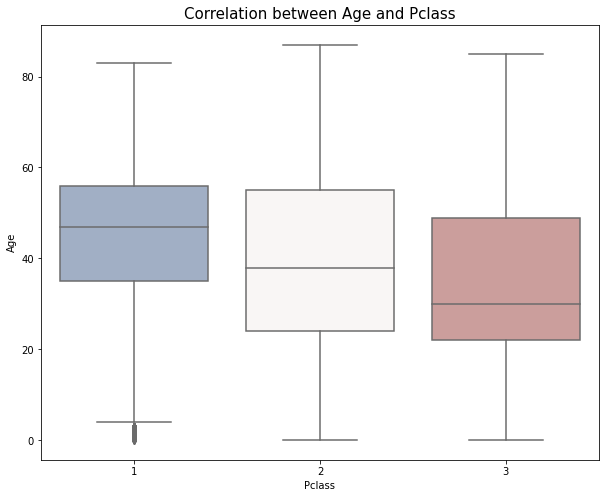

In [1299]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Pclass", y="Age", data=titanic_data, palette="vlag")
plt.title('Correlation between Age and Pclass', fontsize=15);

As seen above, the higher the Pclass the higher median age of a person. May be that is because older people could have earned more money during their life and riched higher job titles.

Let's try to find a correlation between 'Age' and 'Sex'.

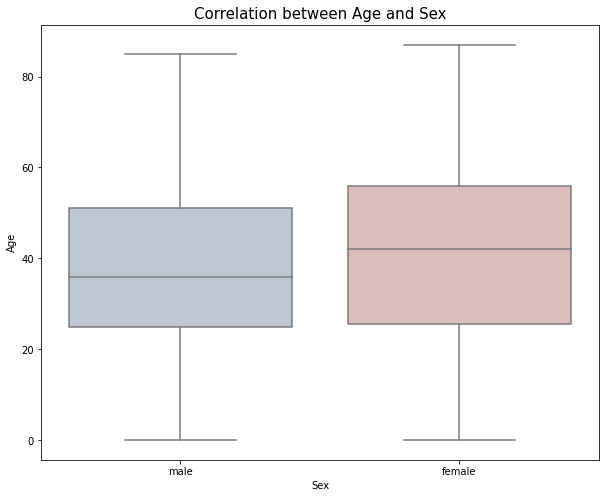

In [1300]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Sex", y="Age", data=titanic_data, palette="vlag")
plt.title('Correlation between Age and Sex', fontsize=15);

As seen above, females had a bigger median.

Consequently, let's fill missing Age based on Median Age in a certain Pclass and Sex.

In [1301]:
titanic_data['Age'] = titanic_data.groupby(['Pclass', 'Sex'])['Age'].transform(lambda group: group.fillna(group.median()))
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       100000 non-null  float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Fare      100000 non-null  float64
 8   Cabin     100000 non-null  object 
 9   Embarked  100000 non-null  object 
 10  Deck      100000 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


## Ommiting unnessesary data (Name)

As seen below, names contain only First Name and Surname without any title or occupation, so there may not be any correlation between name and other features.

In [1302]:
titanic_data.Name.value_counts().head(20)

Johnson, John        31
Smith, James         24
Smith, John          24
Johnson, William     22
Smith, Michael       20
Smith, William       19
Jones, James         19
Smith, Robert        18
Johnson, James       18
Smith, Mary          17
Johnson, Robert      16
Williams, Michael    15
Brown, John          15
Jones, William       15
Davis, Robert        15
Jones, Robert        15
Williams, Robert     14
Williams, John       14
Davis, John          14
Moore, David         14
Name: Name, dtype: int64

So let's delete it.

In [1303]:
titanic_data = titanic_data.drop('Name', axis=1)
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck
PassengerId,,,,,,,,,,
0,1,1,male,44.00,2,0,27.14,C12239,S,C
1,0,3,male,31.00,0,0,13.35,Not stated,S,N
2,0,3,male,0.33,1,2,71.29,Not stated,S,N
3,0,3,male,19.00,0,0,13.04,Not stated,S,N
4,1,3,male,25.00,0,0,7.76,Not stated,S,N
...,...,...,...,...,...,...,...,...,...,...
99995,1,2,female,62.00,0,0,14.86,D17243,C,D
99996,0,2,male,66.00,0,0,11.15,Not stated,S,N
99997,0,3,male,37.00,0,0,9.95,Not stated,S,N


Now all of the missing values are either filled or deleted. Let's check how the shape of our dataset changed.

In [1304]:
print(f"Rows left: {len(titanic_data)}, {titanic_data_shape[0] - len(titanic_data)} raws were deleted")

Rows left: 100000, 0 raws were deleted


In [1305]:
print(f"Columns left: {titanic_data.shape[1]}, {titanic_data_shape[1] - titanic_data.shape[1] + 1} columns were deleted")

Columns left: 10, 2 columns were deleted


## Outlier analysis (boxplots)

Let's find outliers in columns. It can be done using boxplots only with quantitative features like 'Age', 'SibSp', 'Parch', and 'Fare'.

### Age

Text(0.5, 1.0, 'Age')

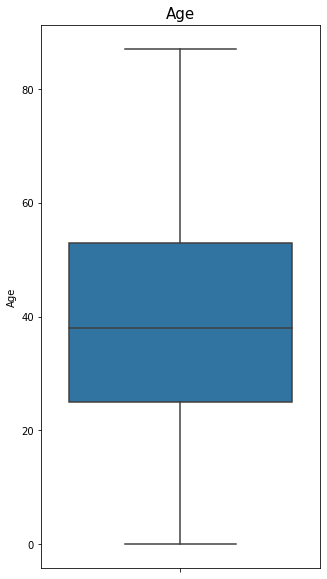

In [1306]:
plt.figure(figsize=(5,10))
sns.boxplot(y="Age", data=titanic_data)
plt.title('Age', fontsize=15)

As we can see there are no outliers for 'Age'.

### SibSp

Text(0.5, 1.0, 'SibSp')

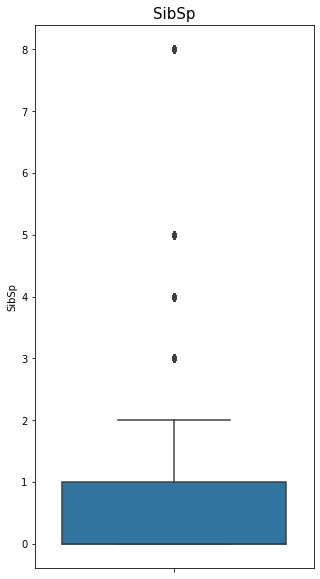

In [1307]:
plt.figure(figsize=(5,10))
sns.boxplot(y="SibSp", data=titanic_data)
plt.title('SibSp', fontsize=15)

Boxplot shows outliers but they don't hurt the results because there can logically be 8 siblings and a wife / a husband, so we will let them be.

### Parch

Text(0.5, 1.0, 'Parch')

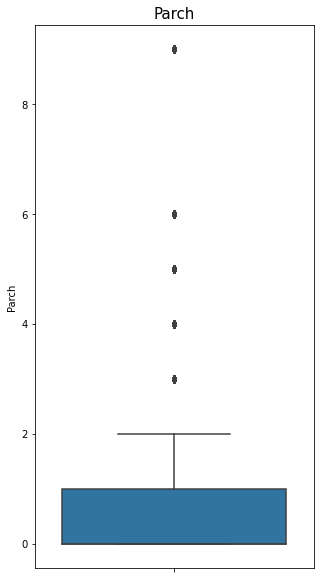

In [1308]:
plt.figure(figsize=(5,10))
sns.boxplot(y="Parch", data=titanic_data)
plt.title('Parch', fontsize=15)

Boxplot shows outliers but they don't hurt the results because there can logically be so many parents and children together, so we will let them be.

### Fare

Text(0.5, 1.0, 'Fare')

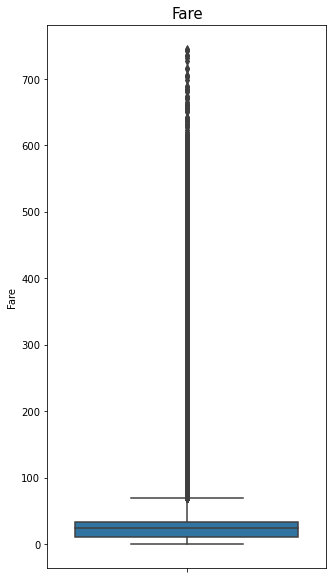

In [1309]:
plt.figure(figsize=(5,10))
sns.boxplot(y="Fare", data=titanic_data)
plt.title('Fare', fontsize=15)

Let's check whether those outliers mild or extreme.

In [1310]:
Q1 = titanic_data['Fare'].quantile(0.25)
Q3 = titanic_data['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_lim_mild = Q1 - 1.5 * IQR
upper_lim_mild = Q3 + 1.5 * IQR
lower_lim_extreme = Q1 - 3 * IQR
upper_lim_extreme = Q3 + 3 * IQR
lower_lim_mild, upper_lim_mild

(-25.15, 68.69)

In [1311]:
lower_lim_extreme, upper_lim_extreme

(-60.339999999999996, 103.88)

In [1312]:
len(titanic_data[titanic_data['Fare'] < lower_lim_mild])

0

As we can see there is no mild and consequently extreme outliers that are below lower limit.

In [1313]:
len(titanic_data[(titanic_data['Fare'] > upper_lim_mild) & (titanic_data['Fare'] < upper_lim_extreme)])

7788

There are 7788 mild outliers that are higher than upper mild limit.

In [1314]:
len(titanic_data[(titanic_data['Fare'] > upper_lim_extreme)])

9413

And there are 9413 extreme outliers that are higher than upper extreme limit.

In total there are 17201 outliers.

Those outliers can be due to mistakes in gathering data but as we know the data is syntatic. Moreover, in real world big prices for cabincs can be due to people who buy tickets and resell them to other people for higher price (resellers).

Consequently, we will not delete the outliers.

However, let's look how those outliers distribute between Pclasses and Embarked.

'Fare' contains outliers, let's check whether they differ by a Pclass.

Text(0.5, 1.0, 'Distribution of Fare outliers between Pclasses')

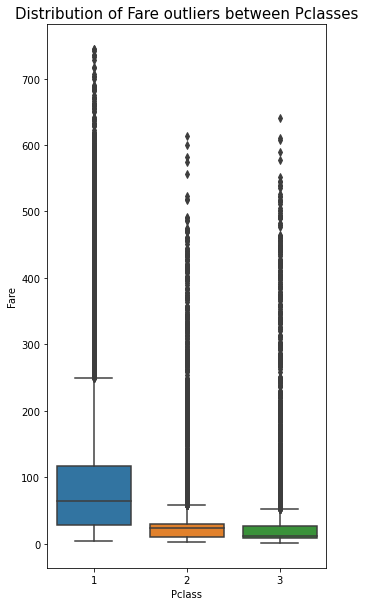

In [1408]:
plt.figure(figsize=(5,10))
sns.boxplot(x='Pclass', y="Fare", data=titanic_data)
plt.title('Distribution of Fare outliers between Pclasses', fontsize=15)

Looking at the graph, there are a lot of ourliers in each Pclass. Let's examine it closer.

### Outliers of Fare feature at the 1st Pclass

In [1316]:
first_class = titanic_data.loc[titanic_data.Pclass == 1]
len(first_class)

30315

There are 30315 people at the 1st class Cabins.

In [1317]:
Q1_first_class = first_class['Fare'].quantile(0.25)
Q3_first_class = first_class['Fare'].quantile(0.75)
IQR_first_class = Q3_first_class - Q1_first_class
lower_lim_mild_first_class = Q1_first_class - 1.5 * IQR_first_class
upper_lim_mild_first_class = Q3_first_class + 1.5 * IQR_first_class
lower_lim_extreme_first_class = Q1_first_class - 3 * IQR_first_class
upper_lim_extreme_first_class = Q3_first_class + 3 * IQR_first_class
lower_lim_mild_first_class, upper_lim_mild_first_class

(-105.2775, 249.8625)

In [1318]:
lower_lim_extreme_first_class, upper_lim_extreme_first_class

(-238.455, 383.04)

In [1319]:
len(first_class[first_class['Fare'] < lower_lim_mild_first_class])

0

There are no outliers at the 1st class that lie below lower limit. Let's search for outtliers at 1st class that lie above the limit.

In [1320]:
mild_outliers_first_class = len(first_class[(first_class['Fare'] > upper_lim_mild_first_class) & (first_class['Fare'] < upper_lim_extreme_first_class)])
print(f"There are {len(first_class[(first_class['Fare'] > upper_lim_mild_first_class) & (first_class['Fare'] < upper_lim_extreme_first_class)])} mild outliers at the First class.")

There are 1294 mild outliers at the First class.


In [1321]:
extreme_outliers_first_class = len(first_class[(first_class['Fare'] > upper_lim_extreme_first_class)])
print(f"And there are {len(first_class[(first_class['Fare'] > upper_lim_extreme_first_class)])} extreme outliers")

And there are 796 extreme outliers


### Outliers of Fare feature at the 2nd Pclass

In [1322]:
second_class = titanic_data.loc[titanic_data.Pclass == 2]
len(second_class)

28679

In [1323]:
Q1_second_class = second_class['Fare'].quantile(0.25)
Q3_second_class = second_class['Fare'].quantile(0.75)
IQR_second_class = Q3_second_class - Q1_second_class
lower_lim_mild_second_class = Q1_second_class - 1.5 * IQR_second_class
upper_lim_mild_second_class = Q3_second_class + 1.5 * IQR_second_class
lower_lim_extreme_second_class = Q1_second_class - 3 * IQR_second_class
upper_lim_extreme_second_class = Q3_second_class + 3 * IQR_second_class
lower_lim_mild_second_class, upper_lim_mild_second_class

(-18.375, 57.745000000000005)

In [1324]:
lower_lim_extreme_second_class, upper_lim_extreme_second_class

(-46.92, 86.29)

In [1325]:
len(second_class[second_class['Fare'] < lower_lim_mild_second_class])

0

There are no outliers at the 2nd class that lie below lower limit. Let's search for outtliers at 1st class that lie above the limit.

In [1326]:
mild_outliers_second_class = len(second_class[(second_class['Fare'] > upper_lim_mild_second_class) & (second_class['Fare'] < upper_lim_extreme_second_class)])
print(f"There are {len(second_class[(second_class['Fare'] > upper_lim_mild_second_class) & (second_class['Fare'] < upper_lim_extreme_second_class)])} mild outliers at the Second class.")

There are 1135 mild outliers at the Second class.


In [1327]:
extreme_outliers_second_class = len(second_class[(second_class['Fare'] > upper_lim_extreme_second_class)])
print(f"And there are {len(second_class[(second_class['Fare'] > upper_lim_extreme_second_class)])} extreme outliers")

And there are 676 extreme outliers


### Outliers of Fare feature at the 3rd Pclass

In [1328]:
third_class = titanic_data.loc[titanic_data.Pclass == 3]
len(third_class)

41006

In [1329]:
Q1_third_class = third_class['Fare'].quantile(0.25)
Q3_third_class = third_class['Fare'].quantile(0.75)
IQR_third_class = Q3_third_class - Q1_third_class
lower_lim_mild_third_class = Q1_third_class - 1.5 * IQR_third_class
upper_lim_mild_third_class = Q3_third_class + 1.5 * IQR_third_class
lower_lim_extreme_third_class = Q1_third_class - 3 * IQR_third_class
upper_lim_extreme_third_class = Q3_third_class + 3 * IQR_third_class
lower_lim_mild_third_class, upper_lim_mild_third_class

(-17.26125, 51.56875)

In [1330]:
lower_lim_extreme_third_class, upper_lim_extreme_third_class

(-43.072500000000005, 77.38)

In [1331]:
len(third_class[third_class['Fare'] < lower_lim_mild_third_class])

0

In [1332]:
mild_outliers_third_class = len(third_class[(third_class['Fare'] > upper_lim_mild_third_class) & (third_class['Fare'] < upper_lim_extreme_third_class)])
print(f"There are {len(third_class[(third_class['Fare'] > upper_lim_mild_third_class) & (third_class['Fare'] < upper_lim_extreme_third_class)])} mild outliers at the Third class.")

There are 1574 mild outliers at the Third class.


In [1333]:
extreme_outliers_third_class = len(third_class[(third_class['Fare'] > upper_lim_extreme_third_class)])
print(f"And there are {len(third_class[(third_class['Fare'] > upper_lim_extreme_third_class)])} extreme outliers")

And there are 1187 extreme outliers


In [1384]:
data_outliers_pclass = {'Mild Outliers':[mild_outliers_first_class, mild_outliers_second_class, mild_outliers_third_class], 'Extreme Outliers':[extreme_outliers_first_class, extreme_outliers_second_class, extreme_outliers_third_class]}  
  
# Creates pandas DataFrame.  
outlier_results_pclass = pd.DataFrame(data_outliers_pclass, index =['1st Pclass', '2nd Pclass', '3rd Class'])  
outlier_results_pclass

,Mild Outliers,Extreme Outliers
1st Pclass,1294,796
2nd Pclass,1135,676
3rd Class,1574,1187


The most number of mild outliers in Fare contains 3rd class and the most number of extreme outliers contains 3rd class. May be it is due to the fact that 3rd class is usually chosen by immigrants, and after reselling of tickets started many immigrants decided to immigrate and bought tickets for higher price. Or may be it is just because there are more 3rd class tickets, than 1st class and 2nd class tickets.

### Distribution of outliers of Fare feature between Embarked values

Text(0.5, 1.0, 'Distribution of Fare outliers between Embarked values')

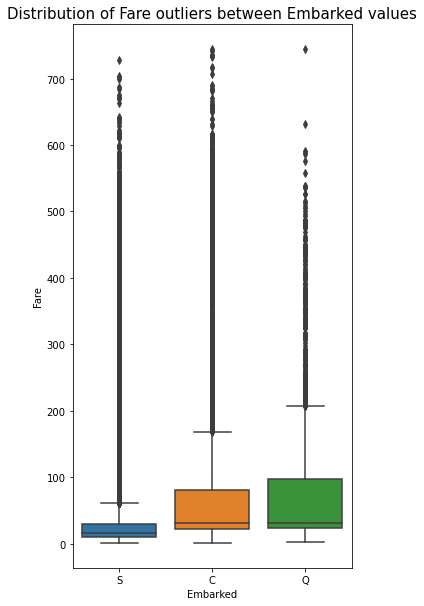

In [1409]:
plt.figure(figsize=(5,10))
sns.boxplot(x='Embarked', y="Fare", data=titanic_data)
plt.title('Distribution of Fare outliers between Embarked values', fontsize=15)

Looking at the graph, we cannot determine certain values, so let's do it by calculations.

### Outliers of Fare feature at the port 'S'

In [1387]:
s_port = titanic_data.loc[titanic_data.Embarked == 'S']
len(s_port)

D:\MiniConda\envs\rsschool-machine-learning-course\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


72389

In [1388]:
Q1_s_port = s_port['Fare'].quantile(0.25)
Q3_s_port = s_port['Fare'].quantile(0.75)
IQR_s_port = Q3_s_port - Q1_s_port
lower_lim_mild_s_port = Q1_s_port - 1.5 * IQR_s_port
upper_lim_mild_s_port = Q3_s_port + 1.5 * IQR_s_port
lower_lim_extreme_s_port = Q1_s_port - 3 * IQR_s_port
upper_lim_extreme_s_port = Q3_s_port + 3 * IQR_s_port
lower_lim_mild_s_port, upper_lim_mild_s_port

(-21.455000000000005, 60.745000000000005)

In [1390]:
lower_lim_extreme_s_port, upper_lim_extreme_s_port

(-52.280000000000015, 91.57000000000002)

In [1391]:
len(s_port[s_port['Fare'] < lower_lim_mild_s_port])

0

In [1392]:
mild_outliers_s_port = len(s_port[(s_port['Fare'] > upper_lim_mild_s_port) & (s_port['Fare'] < upper_lim_extreme_s_port)])
print(f"There are {len(s_port[(s_port['Fare'] > upper_lim_mild_s_port) & (s_port['Fare'] < upper_lim_extreme_s_port)])} mild outliers at the S port.")

There are 5493 mild outliers at the S port.


In [1393]:
extreme_outliers_s_port = len(s_port[(s_port['Fare'] > upper_lim_extreme_s_port)])
print(f"And there are {len(s_port[(s_port['Fare'] > upper_lim_extreme_s_port)])} extreme outliers")

And there are 4182 extreme outliers


### Outliers of Fare feature at the port 'Q'

In [1394]:
q_port = titanic_data.loc[titanic_data.Embarked == 'Q']
len(q_port)

5424

In [1395]:
Q1_q_port = q_port['Fare'].quantile(0.25)
Q3_q_port = q_port['Fare'].quantile(0.75)
IQR_q_port = Q3_q_port - Q1_q_port
lower_lim_mild_q_port = Q1_q_port - 1.5 * IQR_q_port
upper_lim_mild_q_port = Q3_q_port + 1.5 * IQR_q_port
lower_lim_extreme_q_port = Q1_q_port - 3 * IQR_q_port
upper_lim_extreme_q_port = Q3_q_port + 3 * IQR_q_port
lower_lim_mild_q_port, upper_lim_mild_q_port

(-86.85, 207.64999999999998)

In [1396]:
lower_lim_extreme_q_port, upper_lim_extreme_q_port

(-197.2875, 318.0875)

In [1397]:
len(q_port[q_port['Fare'] < lower_lim_mild_q_port])

0

In [1398]:
mild_outliers_q_port = len(q_port[(q_port['Fare'] > upper_lim_mild_q_port) & (q_port['Fare'] < upper_lim_extreme_q_port)])
print(f"There are {len(q_port[(q_port['Fare'] > upper_lim_mild_q_port) & (q_port['Fare'] < upper_lim_extreme_q_port)])} mild outliers at the Q port.")

There are 231 mild outliers at the Q port.


In [1399]:
extreme_outliers_q_port = len(q_port[(q_port['Fare'] > upper_lim_extreme_q_port)])
print(f"And there are {len(q_port[(q_port['Fare'] > upper_lim_extreme_q_port)])} extreme outliers")

And there are 131 extreme outliers


### Outliers of Fare feature at the port 'C'

In [1400]:
c_port = titanic_data.loc[titanic_data.Embarked == 'C']
len(c_port)

22187

In [1401]:
Q1_c_port = c_port['Fare'].quantile(0.25)
Q3_c_port = c_port['Fare'].quantile(0.75)
IQR_c_port = Q3_c_port - Q1_c_port
lower_lim_mild_c_port = Q1_c_port - 1.5 * IQR_c_port
upper_lim_mild_c_port = Q3_c_port + 1.5 * IQR_c_port
lower_lim_extreme_c_port = Q1_c_port - 3 * IQR_c_port
upper_lim_extreme_c_port = Q3_c_port + 3 * IQR_c_port
lower_lim_mild_c_port, upper_lim_mild_c_port

(-65.07500000000002, 168.52500000000003)

In [1402]:
lower_lim_extreme_c_port, upper_lim_extreme_c_port

(-152.67500000000004, 256.12500000000006)

In [1403]:
len(c_port[c_port['Fare'] < lower_lim_mild_c_port])

0

In [1404]:
mild_outliers_c_port = len(c_port[(c_port['Fare'] > upper_lim_mild_c_port) & (c_port['Fare'] < upper_lim_extreme_c_port)])
print(f"There are {len(c_port[(c_port['Fare'] > upper_lim_mild_c_port) & (c_port['Fare'] < upper_lim_extreme_c_port)])} mild outliers at the C port.")

There are 1743 mild outliers at the C port.


In [1406]:
extreme_outliers_c_port = len(c_port[(c_port['Fare'] > upper_lim_extreme_c_port)])
print(f"And there are {len(c_port[(c_port['Fare'] > upper_lim_extreme_c_port)])} extreme outliers")

And there are 1022 extreme outliers


In [1407]:
data_outliers_ports = {'Mild Outliers':[mild_outliers_s_port, mild_outliers_q_port, mild_outliers_c_port], 'Extreme Outliers':[extreme_outliers_s_port, extreme_outliers_q_port, extreme_outliers_c_port]}  
  
# Creates pandas DataFrame.  
outlier_results_ports = pd.DataFrame(data_outliers_ports, index =['S', 'Q', 'C'])  
outlier_results_ports

,Mild Outliers,Extreme Outliers
S,5493,4182
Q,231,131
C,1743,1022


As we can see the most outliers has a 'S' port. However, 'S' port is the most popular one, it occurs in 72% of the time at the Embarked column.

## Feature Engineering

Feature engineering will help with visualizing and analyzing data that we have. Moreover, in the future it can help with a model if we create one.

### AgeGroup Column

Let's transform a continuos feature age into a discrete because it would be easier to spot patterns in a discrete data.

In [1335]:
bins = [0, 14, 25, 35, 60, np.inf]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
titanic_data['AgeGroup'] = pd.cut(titanic_data["Age"], bins, labels = labels)
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,AgeGroup
PassengerId,,,,,,,,,,,
0,1,1,male,44.00,2,0,27.14,C12239,S,C,Adult
1,0,3,male,31.00,0,0,13.35,Not stated,S,N,Young Adult
2,0,3,male,0.33,1,2,71.29,Not stated,S,N,Child
3,0,3,male,19.00,0,0,13.04,Not stated,S,N,Teenager
4,1,3,male,25.00,0,0,7.76,Not stated,S,N,Teenager
...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,female,62.00,0,0,14.86,D17243,C,D,Senior
99996,0,2,male,66.00,0,0,11.15,Not stated,S,N,Senior
99997,0,3,male,37.00,0,0,9.95,Not stated,S,N,Adult


### Fare Band column

Let's transform a continuos feature Fare into a discrete because it would be easier to spot patterns in a discrete data.

In [1336]:
titanic_data['FareBand'] = pd.cut(titanic_data['Fare'], 10)
titanic_data['FareBand'].value_counts()

(-0.064, 75.078]      85445
(75.078, 149.476]      8076
(149.476, 223.874]     2783
(223.874, 298.272]     2305
(372.67, 447.068]       400
(298.272, 372.67]       378
(447.068, 521.466]      351
(521.466, 595.864]      182
(595.864, 670.262]       56
(670.262, 744.66]        24
Name: FareBand, dtype: int64

### Family Column

Let's sum SibSp and Parch into a new feature Family because amount of Family members nomatter whether they are parents or siblings can influence the survival.

In [1337]:
titanic_data['Family'] = titanic_data['SibSp'] + titanic_data['Parch']
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,AgeGroup,FareBand,Family
PassengerId,,,,,,,,,,,,,
0,1,1,male,44.00,2,0,27.14,C12239,S,C,Adult,"(-0.064, 75.078]",2
1,0,3,male,31.00,0,0,13.35,Not stated,S,N,Young Adult,"(-0.064, 75.078]",0
2,0,3,male,0.33,1,2,71.29,Not stated,S,N,Child,"(-0.064, 75.078]",3
3,0,3,male,19.00,0,0,13.04,Not stated,S,N,Teenager,"(-0.064, 75.078]",0
4,1,3,male,25.00,0,0,7.76,Not stated,S,N,Teenager,"(-0.064, 75.078]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,female,62.00,0,0,14.86,D17243,C,D,Senior,"(-0.064, 75.078]",0
99996,0,2,male,66.00,0,0,11.15,Not stated,S,N,Senior,"(-0.064, 75.078]",0
99997,0,3,male,37.00,0,0,9.95,Not stated,S,N,Adult,"(-0.064, 75.078]",0


## Pre-Summary we can make based on Data Quality Assestment

Even at the stage of Data Quality assesment we can make certain conclusions about the dataset:

- dataset contains categorical, ordinal and numerical values
- dataset has no duplicates
- all values but Fare are within logical ranges. Fare feature has around 17000 outliers including extreme outliers. Moreover, the most outliers of Fare feature belong to people at the 1st class or S port. Fare contains outliers but they can be due to resell of tickets which highered price
- the largest amount of missing values had 'Cabin' feature (around 70%). All missing values has been either replaced or deleted.
- we added features 'Family' which is SibSp + Parch, Deck which is the first letter of Cabin, AgeGroup and FareBand
- Pclass has a correlation with Fare. Mean Fare is higher when Pclass is more prestigious.
- Pclass has a correlation with Age. Older people tend to buy Cabins with higher Pclass.
- Female median age is higher than Male median age

# Data exploration

## Vizualization and summary statistics for each variable

### 'Survived' column

As 'Survived' column is a category data there is no use in describe() method. 

Let's see the distribution of values using other ways.

In [1338]:
titanic_data.Survived.value_counts()

0    57226
1    42774
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Not survived vs. Survived')

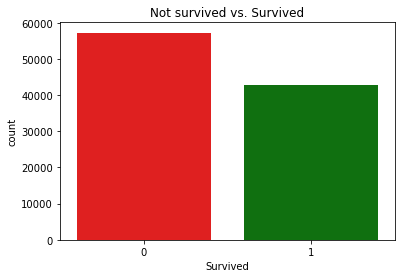

In [1415]:
sns.countplot(x="Survived",data=titanic_data, palette=['red', 'green'])
plt.title('Not survived vs. Survived')

We can already make the conclusion that more people didn't survive than survived.

In [1340]:
print(f"Precisely, {100*titanic_data.Survived.value_counts()[0]/len(titanic_data)}% didn't survived and {100*titanic_data.Survived.value_counts()[1]/len(titanic_data)}% survived")

Precisely, 57.226% didn't survived and 42.774% survived


### 'Pclass' column

Let's examine 'Pclass' column with categorical data closer.

In [1341]:
titanic_data.Pclass.value_counts()

3    41006
1    30315
2    28679
Name: Pclass, dtype: int64

Text(0.5, 1.0, 'Distribution of Pclass by categories')

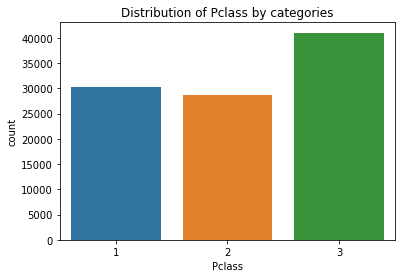

In [1342]:
sns.countplot(x="Pclass",data=titanic_data)
plt.title('Distribution of Pclass by categories')

To conclude, the most people had 3rd class cabin, than 1st, than 2nd.

In [1343]:
print(f"Precisely, {100*titanic_data.Pclass.value_counts()[1]/len(titanic_data)}% had 1st class cabin, {100*titanic_data.Pclass.value_counts()[2]/len(titanic_data)}% had 2nd class cabin and {100*titanic_data.Pclass.value_counts()[3]/len(titanic_data)}% had third class cabin")

Precisely, 30.315% had 1st class cabin, 28.679% had 2nd class cabin and 41.006% had third class cabin


### 'Sex' column

Let's examine 'Sex' column with categorical data closer.

In [1344]:
titanic_data.Sex.value_counts()

male      56114
female    43886
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Distribution of Sex between male and female')

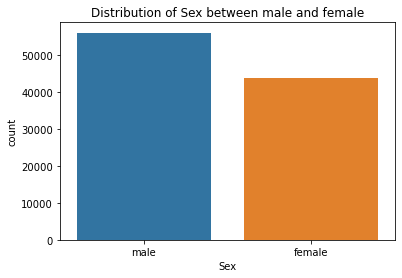

In [1416]:
sns.countplot(x='Sex', data=titanic_data)
plt.title('Distribution of Sex between male and female')

To conclude, there were more male on board than female.

In [1346]:
print(f"Precisely, {100*titanic_data.Sex.value_counts()[0]/len(titanic_data)}% were male and {100*titanic_data.Sex.value_counts()[1]/len(titanic_data)}% were female")

Precisely, 56.114% were male and 43.886% were female


### 'Age' column

Age is numerical, so let's approach it with describe.

In [1347]:
titanic_data.Age.describe()

count    100000.000000
mean         38.322220
std          18.056228
min           0.080000
25%          25.000000
50%          38.000000
75%          53.000000
max          87.000000
Name: Age, dtype: float64

D:\MiniConda\envs\rsschool-machine-learning-course\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

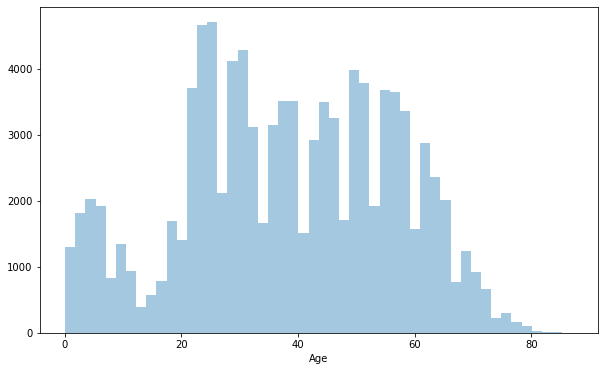

In [1348]:
plt.figure(figsize=(10, 6))
sns.distplot(a=titanic_data['Age'], kde=False)

To conclude median is 38, mean is roughly the same as median. Minimum value is 0.08 years and maximum is 87 years. People's ages are concentrated between 20 and 40 years old.

### 'SibSp' column

Although we assigned SibSp to be numerical, it's between numerical and categorical, and has discrete values, so we will examine it as categorical value.

In [1349]:
titanic_data.SibSp.value_counts()

0    73308
1    19758
2     3703
3     1635
4     1168
8      296
5      132
Name: SibSp, dtype: int64

Text(0.5, 1.0, 'Distribution of SibSp between categories')

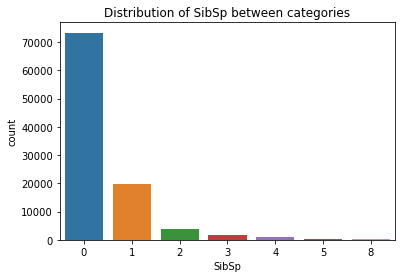

In [1350]:
sns.countplot(x='SibSp', data=titanic_data)
plt.title('Distribution of SibSp between categories')

Let's calculate amount of SibSp values in percent.

In [1351]:
titanic_data.SibSp.value_counts(normalize=True).map(lambda x: x * 100)

0    73.308
1    19.758
2     3.703
3     1.635
4     1.168
8     0.296
5     0.132
Name: SibSp, dtype: float64

To conclude, around 73% had no siblings or spouces on board, around 20% had 1 sibling or spouce on board and etc.

### 'Parch' column

Although we assigned Parch to be numerical, it's between numerical and categorical, and has discrete values, so we will examine it as categorical value.

Text(0.5, 1.0, 'Distribution of Parch between categories')

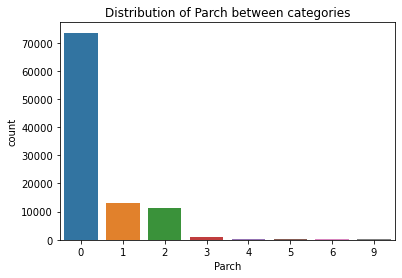

In [1352]:
sns.countplot(x='Parch', data=titanic_data)
plt.title('Distribution of Parch between categories')

In [1353]:
titanic_data.Parch.value_counts()

0    73540
1    12996
2    11236
3      983
4      446
5      331
9      264
6      204
Name: Parch, dtype: int64

Text(0.5, 1.0, 'Distribution of Parch between categories')

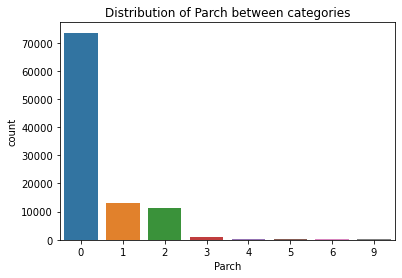

In [1354]:
sns.countplot(x='Parch', data=titanic_data)
plt.title('Distribution of Parch between categories')

Let's calculate amount of Parch values in percent.

In [1355]:
titanic_data.Parch.value_counts(normalize=True).map(lambda x: x * 100)

0    73.540
1    12.996
2    11.236
3     0.983
4     0.446
5     0.331
9     0.264
6     0.204
Name: Parch, dtype: float64

To conclude, around 73% had 0 parent or child on board, around 12% had 1 parent or child on board, around 11% had 1 parent or child on board.

### 'Fare' column

Fare like Age is numerical, so we can use histogram and describe method for it.

In [1356]:
titanic_data.Fare.describe()

count    100000.000000
mean         43.929065
std          69.552036
min           0.680000
25%          10.040000
50%          24.470000
75%          33.500000
max         744.660000
Name: Fare, dtype: float64

D:\MiniConda\envs\rsschool-machine-learning-course\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare'>

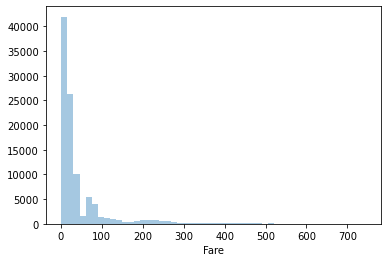

In [1357]:
sns.distplot(a=titanic_data.Fare, kde=False)

To conclude, mean is around 43.92, median is 24.47, min value is around 0.68 and max value is around 744.6, 75% percent of the values are below 33.5.

### 'Cabin' column

Cabin data is categorical, but as seen below it has 26993 categories, so there is no much to say in term of distribution of values.

In [1358]:
titanic_data.Cabin.value_counts()

Not stated    67866
C19828            6
B18148            5
C9767             5
A9127             5
              ...  
C7208             1
A5788             1
C5607             1
D14672            1
D17243            1
Name: Cabin, Length: 26993, dtype: int64

To conclude, the most popular value is 'Not stated', others values popularity differs between 1 and 6 people per cabin.

### 'Embarked' column

Let's examine 'Embarked' column with categorical data closer.

In [1359]:
titanic_data.Embarked.value_counts()

S    72389
C    22187
Q     5424
Name: Embarked, dtype: int64

Text(0.5, 1.0, 'Distribution of Embarked by categories')

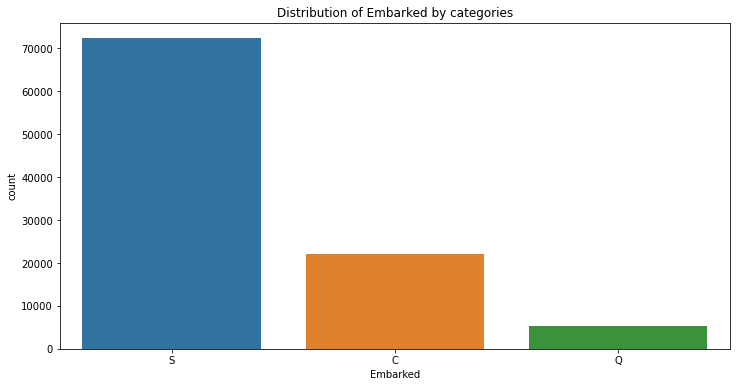

In [1360]:
plt.figure(figsize=(12,6))
sns.countplot(x='Embarked', data=titanic_data)
plt.title('Distribution of Embarked by categories')

In [1361]:
print(f"To conclude, {100*titanic_data.Embarked.value_counts()[0]/len(titanic_data)}% of passangers came from 'S' port, {100*titanic_data.Embarked.value_counts()[1]/len(titanic_data)}% of people came from 'C' port and {100*titanic_data.Embarked.value_counts()[2]/len(titanic_data)}% of people came from 'Q' port")

To conclude, 72.389% of passangers came from 'S' port, 22.187% of people came from 'C' port and 5.424% of people came from 'Q' port


### 'Deck' column

Deck is a categorical column.

In [1418]:
titanic_data.Deck.value_counts()

N    67866
C    11825
B     7439
A     6307
D     3637
E     1749
F      663
G      482
T       32
Name: Deck, dtype: int64

Text(0.5, 1.0, 'Distribution of Deck by categories')

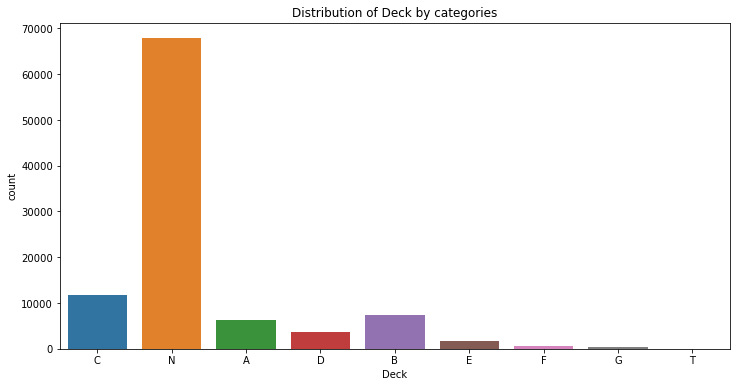

In [1419]:
plt.figure(figsize=(12,6))
sns.countplot(x='Deck', data=titanic_data)
plt.title('Distribution of Deck by categories')

In [1420]:
print(f"To conclude, the most popular deck with {100*titanic_data.Deck.value_counts()[0]/len(titanic_data)}% of is not stated, second most popular deck with {100*titanic_data.Deck.value_counts()[1]/len(titanic_data)}% is 'C' deck")

To conclude, the most popular deck with 67.866% of is not stated, second most popular deck with 11.825% is 'C' deck


### 'AgeGroup' column

In [1422]:
titanic_data.AgeGroup.value_counts()

Adult          43446
Young Adult    19144
Teenager       14888
Senior         11671
Child          10851
Name: AgeGroup, dtype: int64

Text(0.5, 1.0, 'Distribution of AgeGroup by categories')

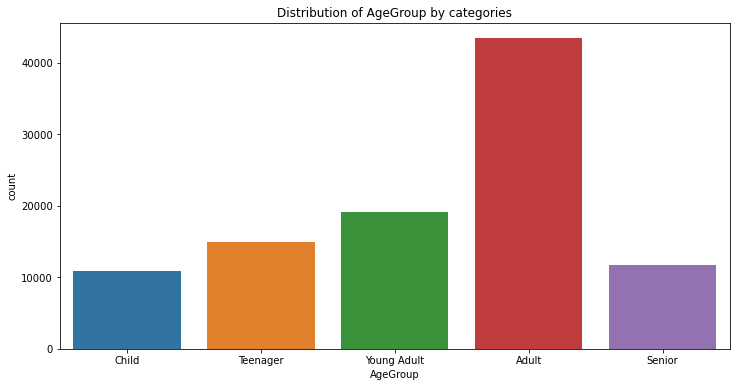

In [1424]:
plt.figure(figsize=(12,6))
sns.countplot(x='AgeGroup', data=titanic_data)
plt.title('Distribution of AgeGroup by categories')

In [1425]:
print(f"To conclude, the most popular AgeGroup with {100*titanic_data.AgeGroup.value_counts()[0]/len(titanic_data)}% of is Adults, second most popular AgeGroup with {100*titanic_data.AgeGroup.value_counts()[1]/len(titanic_data)}% is Young Adult")

To conclude, the most popular AgeGroup with 43.446% of is Adults, second most popular AgeGroup with 19.144% is Young Adult


### 'Fareband' column

In [1431]:
titanic_data.FareBand.value_counts()

(-0.064, 75.078]      85445
(75.078, 149.476]      8076
(149.476, 223.874]     2783
(223.874, 298.272]     2305
(372.67, 447.068]       400
(298.272, 372.67]       378
(447.068, 521.466]      351
(521.466, 595.864]      182
(595.864, 670.262]       56
(670.262, 744.66]        24
Name: FareBand, dtype: int64

Text(0.5, 1.0, 'Distribution of Fare by categories')

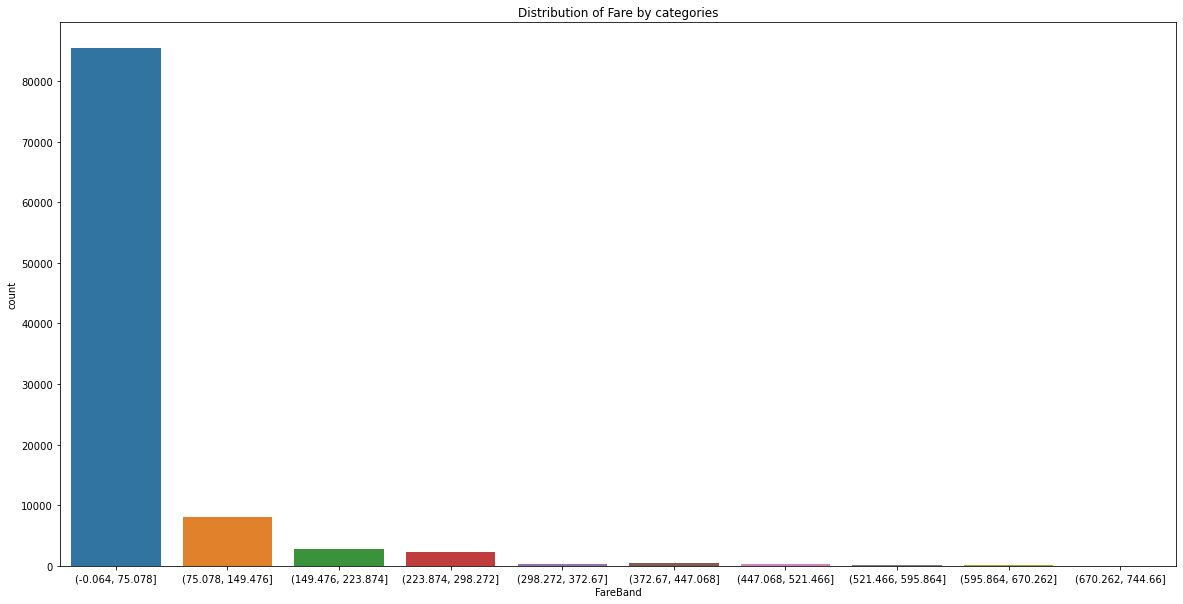

In [1435]:
plt.figure(figsize=(20,10))
sns.countplot(x='FareBand', data=titanic_data)
plt.title('Distribution of Fare by categories')

In [1440]:
print(f"To conclude, the most popular range of Fares with 85% is 0-75, second most popular range of Fares with 8% is 75-150")

To conclude, the most popular range of Fares with 85% is 0-75, second most popular range of Fares with 8% is 75-150


### 'Family' column

In [1427]:
titanic_data.Family.value_counts()

0     61853
1     14212
2     10789
3      8810
4      1870
5      1274
6       498
9       314
10      128
8       111
7       104
11       20
12        7
13        5
14        3
17        2
Name: Family, dtype: int64

Text(0.5, 1.0, 'Number of family members a person travelled with')

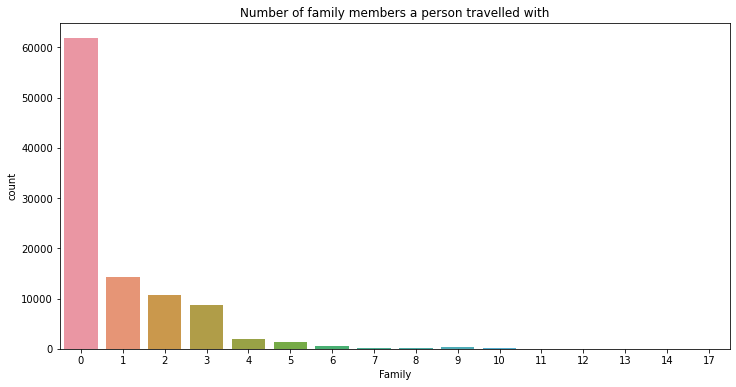

In [1428]:
plt.figure(figsize=(12,6))
sns.countplot(x='Family', data=titanic_data)
plt.title('Number of family members a person travelled with')

In [1429]:
print(f"To conclude, the most popular number of family members with {100*titanic_data.Family.value_counts()[0]/len(titanic_data)}% is 0, second most popular number of family members with {100*titanic_data.Family.value_counts()[1]/len(titanic_data)}% is 1")

To conclude, the most popular number of family members with 61.853% is 0, second most popular number of family members with 14.212% is 1


## Assert relationships

This is a dataset about a Titanic known for the catastrophy, so logically most of the relationships will be with the Survival.

### Target feature 'Survived'

Let's start with finding relationships between 'Survived' feature and others.

### Survived and Age

Hypothetically, age can matter because adolescents and young adults can swim better and are more resistant than too young children or old people. Let's check it.

Also, the Captain of Titanic prioritized placing children and women in lifeboats, so kids could have higher chances to survive.

Text(0.5, 1.0, 'Survival and Age')

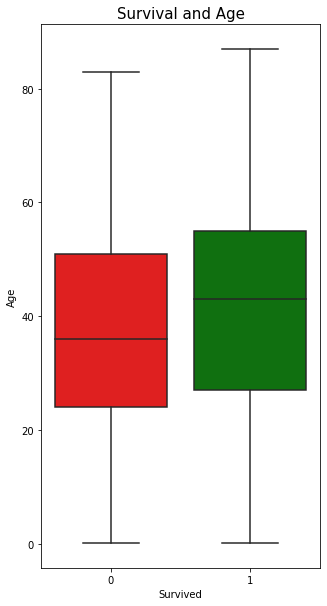

In [1446]:
plt.figure(figsize=(5,10))
sns.boxplot(x='Survived', y="Age", data=titanic_data, palette=['red', 'green'])
plt.title('Survival and Age', fontsize=15)

In [1363]:
titanic_data.groupby('Survived').Age.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,57226.0,36.665654,17.543936,0.08,24.0,36.0,51.0,83.0
1,42774.0,40.538487,18.489222,0.08,27.0,43.0,55.0,87.0


As seen by the graph and table, mean age for those who stayed alive is 40 and median is 43, while mean age for those who did NOT survive is 36 and mmedian is 36. Moreover, 25% percentile of age for those who didn't survive is slightly lower.

Let's examine it further by looking at AgeGroup.

Text(0.5, 1.0, 'Survival and AgeGroup')

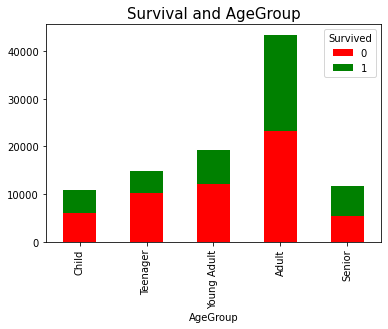

In [1451]:
df2 = titanic_data.groupby(['AgeGroup', 'Survived'])['AgeGroup'].count().unstack('Survived')
df2[[0, 1]].plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Survival and AgeGroup', fontsize=15)

It shows that the hypothesis that young adults and adolescents had more changes to survive because of their physical strength is False. In fact, almost half of adults and seniors survived.

Spoiler: combining insigts that we found above and will find below, Adults and Seniors could have higher chances to survive because they primarily bought 1st and 2nd Pclass (People in 1st and 2nd classes had more chances to survive)

### Survived and Sex

As was said above the Captain ordered to save women first, so we can propose that women survival rate must be significantly higher.

Text(0.5, 1.0, 'Survival and Sex')

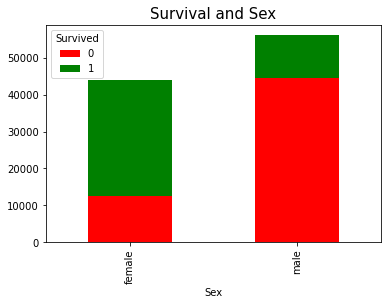

In [1455]:
df2 = titanic_data.groupby(['Sex', 'Survived'])['Sex'].count().unstack('Survived')
df2[[0, 1]].plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Survival and Sex', fontsize=15)

True, women chances to survive are significantly higher.

### Survived and Pclass, Deck

According to the internet, spaces for people in 3rd class were isolated from people in 1st class and 2nd class, and crew forgot about opening some of those bars separating people of 3rd class from others. 

Moreover, 3rd class cabins were on lower decks and their passengers had to come upstairs and could, for instance, drawn through doing so, be blocked by some obstacles or come later to the lifeboats.

Hypothetically, there should be a big difference in survival between people in 3rd class and lower decks and others. 

According to the intertnet,

A Deck had cabins of First Class

B Deck had cabins of First Class

C Deck had cabins of First Class, Second class

D Deck had cabins of First Class, Second class, Third class

E Deck had cabins of First Class, Second class, Third class

F Deck had cabins of Second class, Third class

G Deck had no cabins


Text(0.5, 1.0, 'Survival and Pclass')

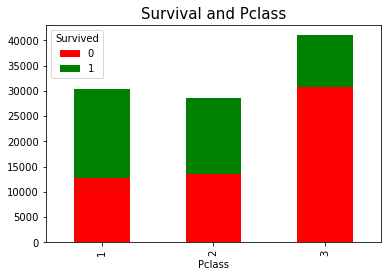

In [1462]:
df2 = titanic_data.groupby(['Pclass', 'Survived'])['Pclass'].count().unstack('Survived')
df2[[0, 1]].plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Survival and Pclass', fontsize=15)

True, the higher the class of a cabin, the more chances a person had to survive. Moreover, there is a big difference between survival of 3rd class passengers and other classes passengers.

Text(0.5, 1.0, 'Survival and Deck')

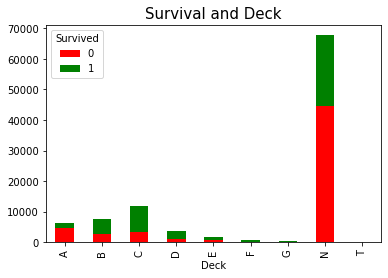

In [1463]:
df2 = titanic_data.groupby(['Deck', 'Survived'])['Deck'].count().unstack('Survived')
df2[[0, 1]].plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Survival and Deck', fontsize=15)

Distribution of Decks and Survival doesn't show us that lower Decks had lower survival rates. However, we shouldn't forget that 70% of Deck data is lost, so we cannot judge precisely by it.

Let's underline that most of the people, whose Deck info is lost, didn't survive.

### To explore Survived, let's go deeper into pclass, age and sex

As we have seen there is a correlation between Pclass and Survived, Sex and Survived. Let's explore it deeper.

1. Women had more chances to survive. Let's see how Sexes are distributed between Pclasses and Ages.

Text(0.5, 1.0, 'Pclass and Sex')

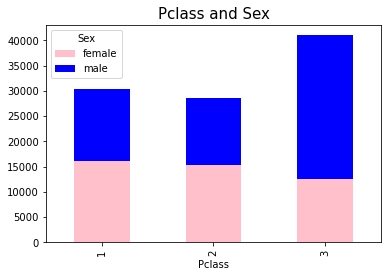

In [1469]:
df2 = titanic_data.groupby(['Pclass', 'Sex'])['Pclass'].count().unstack('Sex')
df2[['female', 'male']].plot(kind='bar', stacked=True, color=['pink', 'blue'])
plt.title('Pclass and Sex', fontsize=15)

In 1st and 2nd Pclasses women and men distributed almost equally. However, at the 3rd Pclass (and we remember that most of 3rd class didn't survive) consists largely of men.

2. Let's see go a little deeper into exploring correlationships of Age.

In Data Quality Assesment we found that higher mean age correlates with higher class of a Cabin. Let's explore it deeper with a table.

In [1367]:
titanic_data.groupby('Pclass').Age.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,30315.0,44.829386,14.481674,0.08,35.0,47.0,55.0,83.0
2,28679.0,38.629514,18.950565,0.08,25.0,38.0,54.0,87.0
3,41006.0,33.296672,18.227813,0.08,22.0,31.0,48.0,85.0


True, we made sure that people who are older tend to choose a cabin of a higher class.

May be a slightly bigger change of survival of people in 40s rather than 30s is because they prefered 1st and 2nd class.

3. We have already found that median Female age is higher than median Male age. Let's explore it a little deeper in a table.

In [1368]:
titanic_data.groupby('Sex').Age.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,43886.0,40.031853,19.581473,0.08,26.0,42.0,56.0,87.0
male,56114.0,36.985140,16.645199,0.08,25.0,36.0,51.0,85.0


4. Let's see the whole picture of a relathionship of Sex, Age, Pclass and Survived. For that let's draw to Scatterplots for each Sex.

Let's start with females.

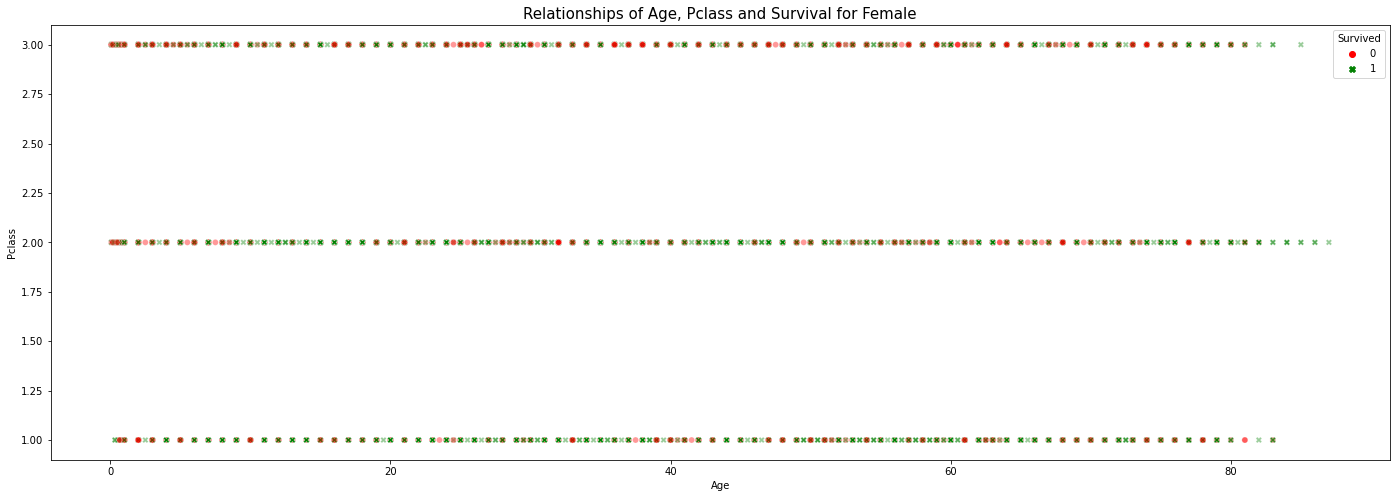

In [1470]:
titanic_data_female = titanic_data.loc[titanic_data.Sex == 'female']
titanic_data_male = titanic_data.loc[titanic_data.Sex == 'male']
plt.figure(figsize=(24, 8))
sns.scatterplot(data = titanic_data_female, x = "Age", y = "Pclass", hue = "Survived", style = 'Survived',palette=['red', 'green'], alpha=0.4)
plt.title('Relationships of Age, Pclass and Survival for Female', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Relationship of Pclass and Survival for Female')

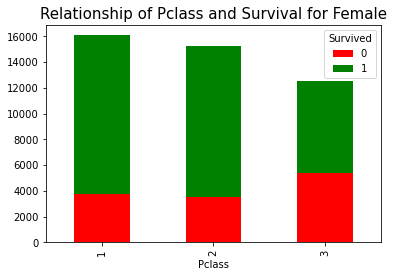

In [1474]:
df2 = titanic_data_female.groupby(['Pclass', 'Survived'])['Pclass'].count().unstack('Survived')
df2[[0, 1]].plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Relationship of Pclass and Survival for Female', fontsize=15)

Text(0.5, 1.0, 'Relationships of AgeGroup and Survival for Female')

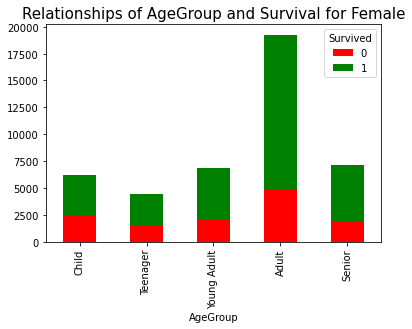

In [1475]:
df2 = titanic_data_female.groupby(['AgeGroup', 'Survived'])['Age'].count().unstack('Survived')
df2[[0, 1]].plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Relationships of AgeGroup and Survival for Female', fontsize=15)

To conclude, 
1) Most of females in 1st and 2nd classes with any age Survived.

2) Around half of women in 3rd class with any age Survived.

3) Women tend to survive no matter what age they have

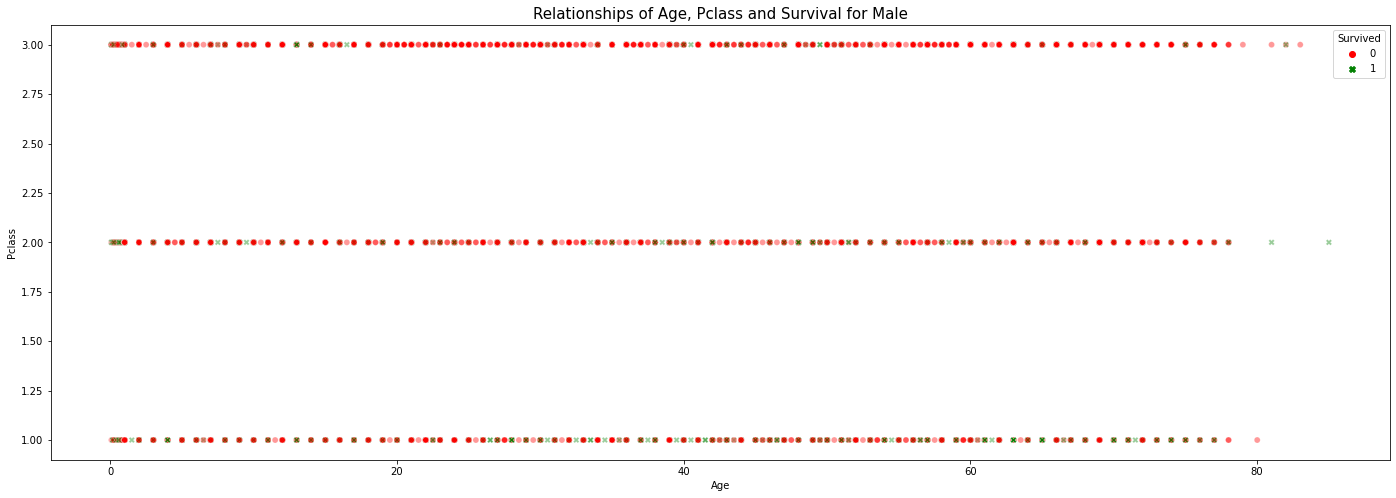

In [1471]:
plt.figure(figsize=(24, 8))
sns.scatterplot(data = titanic_data_male, x = "Age", y = "Pclass", hue = "Survived", style='Survived', palette=['red', 'green'], alpha=0.4)
plt.title('Relationships of Age, Pclass and Survival for Male', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Relationship of Pclass and Survival for Male')

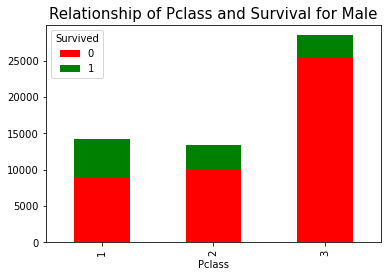

In [1477]:
df2 = titanic_data_male.groupby(['Pclass', 'Survived'])['Pclass'].count().unstack('Survived')
df2[[0, 1]].plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Relationship of Pclass and Survival for Male', fontsize=15)

Text(0.5, 1.0, 'Relationship of AgeGroup and Survival for Male')

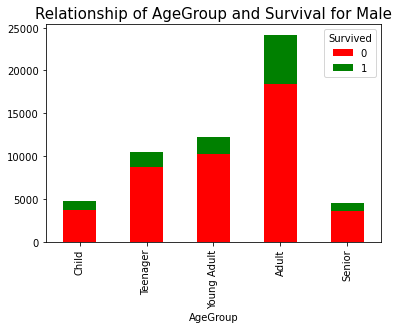

In [1479]:
df2 = titanic_data_male.groupby(['AgeGroup', 'Survived'])['Age'].count().unstack('Survived')
df2[[0, 1]].plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Relationship of AgeGroup and Survival for Male', fontsize=15)

To conclude,

1) Men had higher chances to survive if they were in 1st class

2) The higherst survival chance had male in AgeGroup - Adults

### Survived and SibSp

Assuming about relathionship of Survived and SibSp is interesting because of so small info we have about SibSp. In fact, we know only amount of Siblings/Spouses but we cannot match people and their siblings and see what age, sex and etc. their exact Siblings/Spauses had. With info about relationships we found above we could speculate.

For example, we could say that if a person has a sister, he might sacrifise his spot on a lifeboat for her and etc. But we don't have this data, so let's not speculate and just see info that graphs show us.

D:\MiniConda\envs\rsschool-machine-learning-course\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relationship of SibSp and Survival')

<Figure size 720x2160 with 0 Axes>

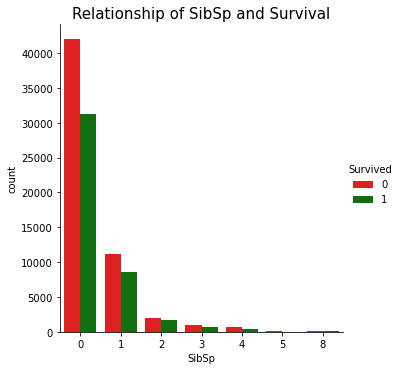

In [1480]:
plt.figure(figsize=(10,30))
sns.catplot('SibSp', data=titanic_data, hue='Survived', kind='count', palette=['red', 'green'])
plt.title('Relationship of SibSp and Survival', fontsize=15)

As we can see people who had 0 SibSp had a slightly smaller chance of Survival. As the amount of SibSp increase, chance of survival becomes closer to 50%/50%. It can be due to the fact that relatives tend to help each other.

### Survived and Parch

I will not make any speculations about this relatioship because of the same reason as in 'Survived and SibSp'.

D:\MiniConda\envs\rsschool-machine-learning-course\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relationship of Parch and Survival')

<Figure size 720x2160 with 0 Axes>

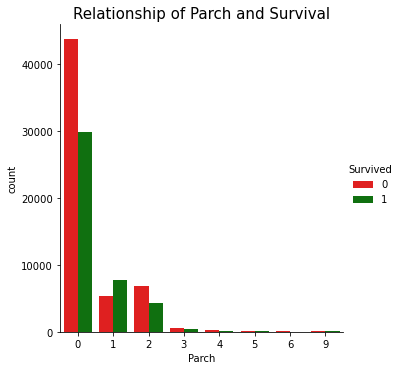

In [1481]:
plt.figure(figsize=(10,30))
sns.catplot('Parch', data=titanic_data, hue='Survived', kind='count', palette=['red', 'green'])
plt.title('Relationship of Parch and Survival', fontsize=15)

The relathionship is similar to the one between 'Survived' and 'SibSp' As we can see people who had 0 Parch had a slightly smaller chance of Survival. As the amount of Parch increase, chance of survival becomes closer to 50%/50%. It can be due to the fact that relatives tend to help each other.

### Survived and Family

Let's look closer at the relationship between Survived and Family without diving it into SibSp and Parch.

D:\MiniConda\envs\rsschool-machine-learning-course\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relationship of amount of Family members and Survival')

<Figure size 720x2160 with 0 Axes>

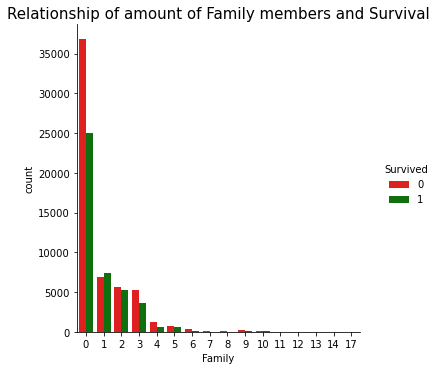

In [1488]:
plt.figure(figsize=(10,30))
sns.catplot('Family', data=titanic_data, hue='Survived', kind='count', palette=['red', 'green'])
plt.title('Relationship of amount of Family members and Survival', fontsize=15)

There is the same pattern as with SibSp and Survived, Parch and Survived. Those who had no relatives had smaller chances to survive.

Let's examine the pattern on a scatterplot.

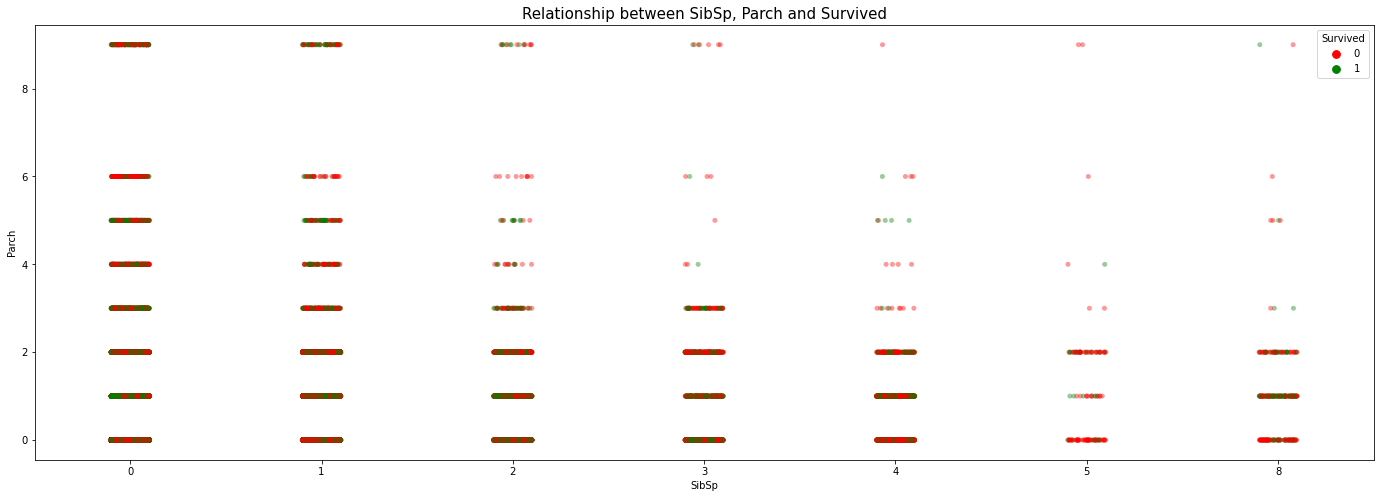

In [1490]:
plt.figure(figsize=(24, 8))
#sns.scatterplot(data = titanic_data, x = "SibSp", y = "Parch", hue = "Survived", style='Survived', palette=['red', 'green'], alpha=0.4)
sns.stripplot(x = "SibSp", y = "Parch", hue="Survived", palette=['red', 'green'], data = titanic_data, jitter = 1, alpha=0.4)
plt.title('Relationship between SibSp, Parch and Survived', fontsize=15)
plt.show()

The scatterplot didn't give us a clear info.

### Survived and Embarked

There is a very small change that port city could influence Survival because all of this cities are ports relatively in the same area (France, England and Ireland), and a lot of people who came on board of Titanic there could be living in different cities.

Text(0.5, 1.0, 'Relationship between Embarked and Survival')

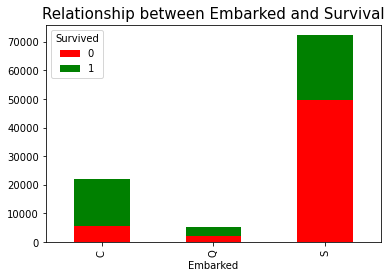

In [1493]:
df2 = titanic_data.groupby(['Embarked', 'Survived'])['Embarked'].count().unstack('Survived')
df2[[0, 1]].plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Relationship between Embarked and Survival', fontsize=15)

As we can see there is a difference in survival between ports. People from 'C' and 'Q' ports tended to survive. But it can be caused by other factors like Pclass, Sex or Age. Let's check them.

### Embarked and Pclass

Text(0.5, 1.0, 'Relationship between Embarked and Pclass')

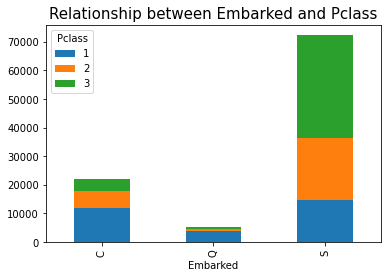

In [1497]:
df2 = titanic_data.groupby(['Embarked', 'Pclass'])['Embarked'].count().unstack('Pclass')
df2[[1, 2, 3]].plot(kind='bar', stacked=True)
plt.title('Relationship between Embarked and Pclass', fontsize=15)

Around 80% of people in 'C' and 'Q' ports had cabins in 1st and 2nd classes while half of people from 'S' port had cabins of 3rd class.

It can explain why people in 'C' and 'Q' ports tended to survive.

### Embarked and Sex

Text(0.5, 1.0, 'Relationship between Embarked and Sex')

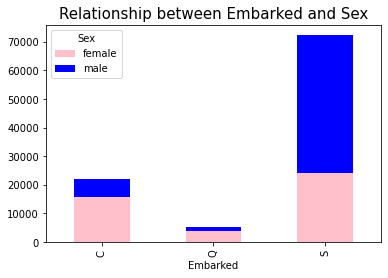

In [1500]:
df2 = titanic_data.groupby(['Embarked', 'Sex'])['Embarked'].count().unstack('Sex')
df2[['female', 'male']].plot(kind='bar', stacked=True, color=['pink', 'blue'])
plt.title('Relationship between Embarked and Sex', fontsize=15)

Majority of people from 'C' and 'Q' ports were females, and as we know women tend to survive, so again higher rate of survival of people from 'C' and 'Q' ports can be explained. 

### Embarked and Age

Text(0.5, 1.0, 'Embarked and Age')

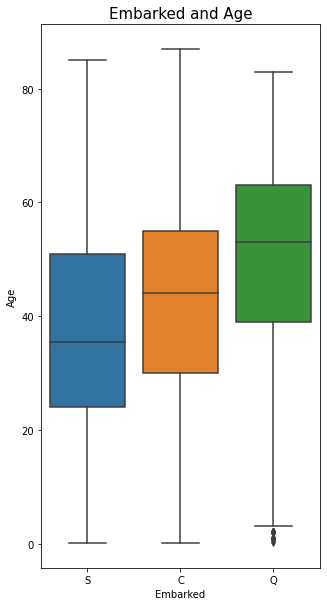

In [1501]:
plt.figure(figsize=(5,10))
sns.boxplot(x='Embarked', y="Age", data=titanic_data)
plt.title('Embarked and Age', fontsize=15)

People from 'Q' port had the highest median age, from 'C' port second, from 'S' port third. I don't think that correlates with survival rate of 'C' and 'Q' ports but as we know age is

## Target feature Fare

### Fare and Pclass

### Fare and Age

Following modern world logic hypothetically tickets for children and seniors could be lower in price. However, there is no info on the internet telling that tickets were divided into tickets for children, adults, and seniors, so we shouldn't think this way.

<AxesSubplot:xlabel='Fare', ylabel='Age'>

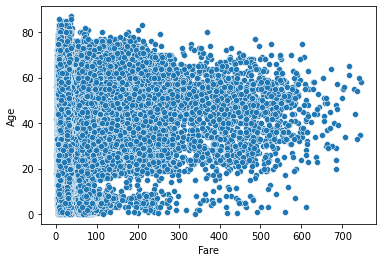

In [1380]:
sns.scatterplot(x=titanic_data['Fare'], y=titanic_data['Age'])

As we can see there is no clear relationship between Age and Fare. For example, people whose age below 20 could have fare from around 0 to around 600, and etc.

To underline, the highest Fare tended to have people with age between 30-70 which can be exaplined by choosing higher Pclasses.

### Fare and Sex

As said above, tickets were not divided into categories, so we can assume that Fare was distributed equally between sexes.

Text(0.5, 1.0, 'Fare and Sex')

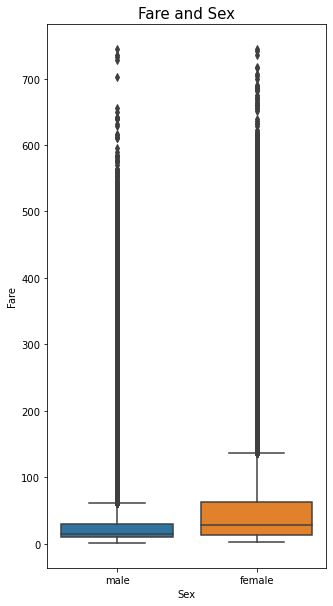

In [1381]:
plt.figure(figsize=(5,10))
sns.boxplot(x='Sex', y="Fare", data=titanic_data)
plt.title('Fare and Sex', fontsize=15)

In [1382]:
titanic_data.groupby('Sex').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,43886.0,55.214484,79.238188,1.61,12.58,28.31,62.10,744.46
male,56114.0,35.102892,59.438364,0.68,9.13,13.62,29.94,744.66


Women tended to have higher fares. Probably, it has nothing to do with the fact that they are female. Just there were more females in 1st, and 2nd Pclasses, and Fares there are higher.

## Target Feature Family

### Family and Sex

Let's examine the relathionship between the amount of Family and Sex.

D:\MiniConda\envs\rsschool-machine-learning-course\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


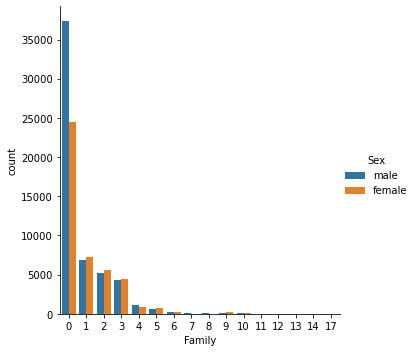

In [1383]:
sns.catplot('Family', data=titanic_data, hue='Sex', kind='count')

Men had a higher tendency to travel alone than women. With results that people with relatives had a higher chance of survival, it can add to the fact that men survived less than women.

### Family and Age

# Summary

## Data Quality assesment
- dataset contains categorical, ordinal and numerical values
- dataset has no duplicates
- all values but Fare are within logical ranges. Fare feature has around 17000 outliers including extreme outliers. Moreover, the most outliers of Fare feature belong to people at the 1st class or S port. Fare contains outliers but they can be due to resell of tickets which highered price
- the largest amount of missing values had 'Cabin' feature (around 70%). All missing values has been either replaced or deleted.
- we added features 'Family' which is SibSp + Parch, Deck which is the first letter of Cabin, AgeGroup and FareBand
- Pclass has a correlation with Fare. Mean Fare is higher when Pclass is more prestigious.
- Pclass has a correlation with Age. Older people tend to buy Cabins with higher Pclass.
- Female median age is higher than Male median age

## Summary statistics

- around 57% of people didn't survive
- around 41% of people had 3rd Pclass
- 56% of people were men
- median age is 38
- around 73% percent had no Siblings, Spouses, Parents or Children with them
- mean fare is around 43.92
- around 72% percent of people came from 'S' port
- 67% percent of Cabins are Not stated, and 11% of cabins were located on 'C' deck
- almost half of people were adults, and 20% were young adults
- around 61% travelled without relatives
- 85% of Fares were below 75

## Assert relationships